

```
# author: puru panta (purupanta@uky.edu)
# date: 11/30/2024
# filename: PredictMLDL_Separate
```



In [1]:
!pip install import-ipynb

**STEP1: Load google-drive, and libraries**

In [2]:
# Mounting google drive if it is already not mounted
def LoadGoogleDrive(googleDriveDir):
  # Link Google Drive
  import os
  # Check if Google Drive is already mounted
  if not os.path.exists(googleDriveDir + "/MyDrive"):
      print("Mounting Google Drive...")
      from google.colab import drive
      drive.mount(googleDriveDir)
  else:
      print("Google Drive is already mounted!")

from google.colab import drive
googleDriveFolder = "/content/drive"
LoadGoogleDrive(googleDriveFolder)

Google Drive is already mounted!


In [3]:
import sys
import import_ipynb

# 1. Set path to the directory where mylib.ipynb is located
lib_path = '/content/drive/MyDrive/Colab Notebooks/P_HINTS6/lib'
sys.path.append(lib_path)
# 2. Change current working directory to that path
%cd "$lib_path"

# 3. Now import the notebook
from app_lib import *
from logistic_regression_pipe import *
from random_forest_pipe import *
from tabnet_pipe import *
from saint_pipe import *
from xgboost_pipe import *
from tabpfn_pipe import *
from stacking_ensemble_pipe import *
from shap_pipe import *
from features_analysis import *

/content/drive/MyDrive/Colab Notebooks/P_HINTS6/lib


**STEP2: Load data**

In [4]:
ip_file_path = googleDriveFolder + "/MyDrive/Colab Notebooks/P_HINTS6/op_data/hints6_public_filtered_v2.xlsx"
ip_sheet_name = 'df_cleaned'
df_orig = load_data(verbose_level=1, ip_file_path=ip_file_path, ip_sheet_name=ip_sheet_name)

Ip File Path: /content/drive/MyDrive/Colab Notebooks/P_HINTS6/op_data/hints6_public_filtered_v2.xlsx
 SheetName: df_cleaned
df_orig.shape: (4865, 27)


**STEP3: Train-Test split**

In [5]:
df = df_orig.copy()
# Set your target column name
target_col = 'MedConditions_HeartCondition'

# Split into features (X) and target (y)
X = df_orig.drop(columns=[target_col])
y = df_orig[target_col]

In [6]:
# Run preprocessing
verbose_level = 2
result = data_preprocessing(verbose_level, X, y)

# ➤ Scaled features (ready for model input)
X_train_res_scaled = result['X_train_res_scaled']
X_val_scaled = result['X_val_scaled']
X_test_scaled = result['X_test_scaled']

# ➤ Raw feature splits (before scaling)
X_train = result['X_train']              # original train split
X_train_res = result['X_train_res']      # SMOTE-balanced train
X_val = result['X_val']
X_test = result['X_test']

# ➤ Corresponding labels
y_train = result['y_train']              # before SMOTE
y_train_res = result['y_train_res']      # after SMOTE
y_val = result['y_val']
y_test = result['y_test']

# ➤ Feature names (for inspection, SHAP, etc.)
features = result['features']



Original data shape: (4865, 26)

Before SMOTE => (Train shape: (2919, 26)), (Validation shape: (973, 26)), (Test shape: (973, 26))
After SMOTE  => (Train shape: (5271, 26)), (Validation shape: (973, 26)), (Test shape: (973, 26))
After Scaling => (Train shape: (5271, 26)), (Validation shape: (973, 26)), (Test shape: (973, 26))


**STEP4: Predictions Starts**

**1. Logistic Regression:**

Best threshold (F1): 0.20

🔎 Test Accuracy (threshold=0.20): 0.78
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.79      0.87       883
     Class 1       0.25      0.70      0.37        90

    accuracy                           0.78       973
   macro avg       0.61      0.74      0.62       973
weighted avg       0.90      0.78      0.82       973


AUC-ROC (Test): 0.80


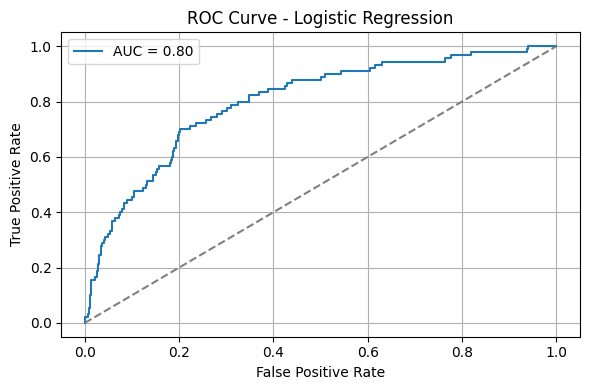


📊 Top 10 Most Important Features (Logistic Regression):
                    Feature  Coefficient
22          smokeStat_Never    -3.263438
16   GeneralHealth_VeryGood    -2.882971
17       GeneralHealth_Good    -2.882751
21         smokeStat_Former    -2.508156
25            eCigUse_Never    -1.967456
18       GeneralHealth_Fair    -1.950030
15  GeneralHealth_Excellent    -1.868740
20        smokeStat_Current    -1.676415
24           eCigUse_Former    -1.344602
9                       Age     0.973956


In [7]:
model_lr, results_lr = run_logistic_regression_pipeline(
  X_train_res_scaled, y_train_res,
  X_val_scaled, y_val,
  X_test_scaled, y_test,
  features
)


**2. Random Forest:**

Best threshold (F1): 0.19

🔎 Test Accuracy (threshold=0.19): 0.71
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.71      0.82       883
     Class 1       0.19      0.67      0.30        90

    accuracy                           0.71       973
   macro avg       0.57      0.69      0.56       973
weighted avg       0.88      0.71      0.77       973


AUC-ROC (Test): 0.76


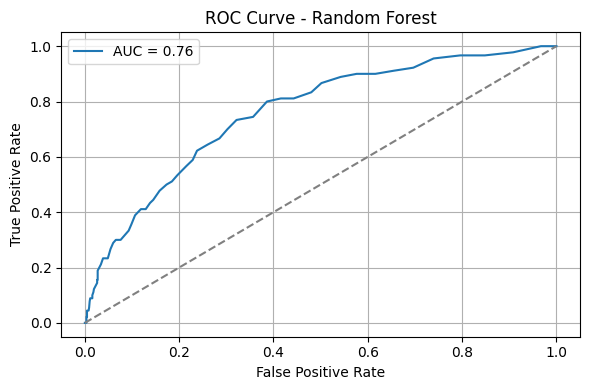


📊 Top 10 Most Important Features (Random Forest):
                          Feature  Importance
22                smokeStat_Never    0.123182
9                             Age    0.120084
16         GeneralHealth_VeryGood    0.094567
17             GeneralHealth_Good    0.069465
11                            BMI    0.067047
13  WeeklyMinutesModerateExercise    0.062386
21               smokeStat_Former    0.049647
7              AverageTimeSitting    0.044641
0                  FreqGoProvider    0.041428
15        GeneralHealth_Excellent    0.040288


In [8]:
model_rf, results_rf = run_random_forest_pipeline(
  X_train_res_scaled, y_train_res,
  X_val_scaled, y_val,
  X_test_scaled, y_test,
  features
)


**3. TabNet:**

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.6702  | val_auc: 0.57397 |  0:00:01s
epoch 1  | loss: 0.47827 | val_auc: 0.63768 |  0:00:01s
epoch 2  | loss: 0.39138 | val_auc: 0.64773 |  0:00:02s
epoch 3  | loss: 0.35787 | val_auc: 0.66936 |  0:00:02s
epoch 4  | loss: 0.31026 | val_auc: 0.67032 |  0:00:03s
epoch 5  | loss: 0.27992 | val_auc: 0.68664 |  0:00:04s
epoch 6  | loss: 0.26482 | val_auc: 0.69767 |  0:00:04s
epoch 7  | loss: 0.25236 | val_auc: 0.72149 |  0:00:05s
epoch 8  | loss: 0.2451  | val_auc: 0.70263 |  0:00:05s
epoch 9  | loss: 0.23793 | val_auc: 0.71412 |  0:00:06s
epoch 10 | loss: 0.23707 | val_auc: 0.69335 |  0:00:07s
epoch 11 | loss: 0.2286  | val_auc: 0.6783  |  0:00:07s
epoch 12 | loss: 0.23145 | val_auc: 0.69207 |  0:00:08s
epoch 13 | loss: 0.2255  | val_auc: 0.68936 |  0:00:08s
epoch 14 | loss: 0.22255 | val_auc: 0.6938  |  0:00:09s
epoch 15 | loss: 0.22477 | val_auc: 0.70171 |  0:00:10s
epoch 16 | loss: 0.22477 | val_auc: 0.6851  |  0:00:10s
epoch 17 | loss: 0.22326 | val_auc: 0.68878 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Best threshold (F1): 0.26

🔎 Test Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.88      0.91       883
     Class 1       0.27      0.43      0.33        90

    accuracy                           0.84       973
   macro avg       0.60      0.66      0.62       973
weighted avg       0.88      0.84      0.85       973

AUC-ROC (Test): 0.76


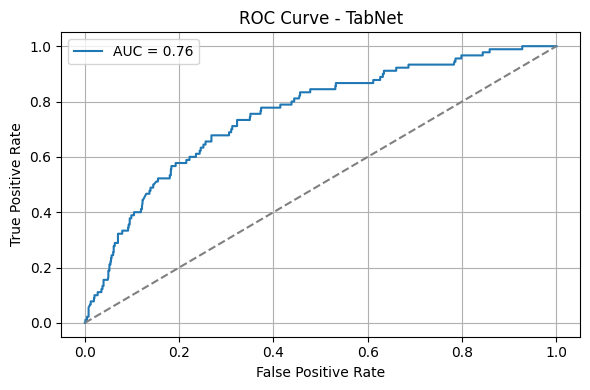


📊 Top 10 Important Features (TabNet):
                     Feature  Importance
5   MedConditions_Depression    0.312558
9                        Age    0.171540
20         smokeStat_Current    0.102044
22           smokeStat_Never    0.083344
18        GeneralHealth_Fair    0.071413
15   GeneralHealth_Excellent    0.044855
2     MedConditions_Diabetes    0.029472
7         AverageTimeSitting    0.029458
10               BirthGender    0.028636
16    GeneralHealth_VeryGood    0.027951


In [9]:
model_tabnet, results_tabnet = run_tabnet_pipeline(
  X_train_res_scaled, y_train_res,
  X_val_scaled, y_val,
  X_test_scaled, y_test,
  features
)


**4. SAINT Contrastive Pretraining (Balanced Batches):**

[Pretrain] Epoch 1: Loss = 4.2168
[Pretrain] Epoch 2: Loss = 3.8353
[Pretrain] Epoch 3: Loss = 3.6354
[Pretrain] Epoch 4: Loss = 3.5225
[Pretrain] Epoch 5: Loss = 3.4461
[Pretrain] Epoch 6: Loss = 3.3926
[Pretrain] Epoch 7: Loss = 3.3423
[Pretrain] Epoch 8: Loss = 3.3131
[Pretrain] Epoch 9: Loss = 3.2743
[Pretrain] Epoch 10: Loss = 3.2219
[Finetune] Epoch 1: Loss = 0.7738
[Finetune] Epoch 2: Loss = 0.4729
[Finetune] Epoch 3: Loss = 0.3217
[Finetune] Epoch 4: Loss = 0.2741
[Finetune] Epoch 5: Loss = 0.2542
[Finetune] Epoch 6: Loss = 0.2541
[Finetune] Epoch 7: Loss = 0.2408
[Finetune] Epoch 8: Loss = 0.2342
[Finetune] Epoch 9: Loss = 0.2219
[Finetune] Epoch 10: Loss = 0.2280

✅ Best threshold (F1): 0.12

🔎 Test Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.73      0.83       883
     Class 1       0.21      0.71      0.33        90

    accuracy                           0.73       973
   macro avg       0.59  

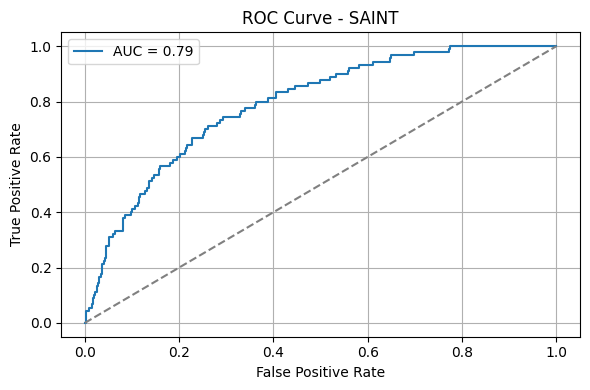


📊 Top 10 Important Features (SAINT):
                      Feature  Importance
5    MedConditions_Depression    0.123533
20          smokeStat_Current    0.099202
9                         Age    0.090106
3        MedConditions_HighBP    0.084649
11                        BMI    0.080945
18         GeneralHealth_Fair    0.075641
17         GeneralHealth_Good    0.074065
7          AverageTimeSitting    0.066984
4   MedConditions_LungDisease    0.051253
22            smokeStat_Never    0.042148


In [10]:
model_saint, results_saint = run_saint_pipeline(
  X_train_res_scaled, y_train_res,
  X_val_scaled, y_val,
  X_test_scaled, y_test,
  features
)


**5. XGBoost:**

[0]	train-auc:0.93342	val-auc:0.69236
[1]	train-auc:0.93570	val-auc:0.69524
[2]	train-auc:0.93839	val-auc:0.69739
[3]	train-auc:0.93896	val-auc:0.69456
[4]	train-auc:0.94025	val-auc:0.70179
[5]	train-auc:0.94438	val-auc:0.70039
[6]	train-auc:0.94754	val-auc:0.70195
[7]	train-auc:0.94723	val-auc:0.70325
[8]	train-auc:0.94932	val-auc:0.70058
[9]	train-auc:0.95011	val-auc:0.70207
[10]	train-auc:0.95147	val-auc:0.70490
[11]	train-auc:0.95244	val-auc:0.70986
[12]	train-auc:0.95414	val-auc:0.71279
[13]	train-auc:0.95494	val-auc:0.71431
[14]	train-auc:0.95668	val-auc:0.71412
[15]	train-auc:0.95780	val-auc:0.71234
[16]	train-auc:0.95914	val-auc:0.71074
[17]	train-auc:0.95955	val-auc:0.71487
[18]	train-auc:0.96039	val-auc:0.71386
[19]	train-auc:0.96135	val-auc:0.71392
[20]	train-auc:0.96196	val-auc:0.71262
[21]	train-auc:0.96321	val-auc:0.71355
[22]	train-auc:0.96365	val-auc:0.71402
[23]	train-auc:0.96444	val-auc:0.71359
[24]	train-auc:0.96479	val-auc:0.71354
[25]	train-auc:0.96503	val-auc:0.71

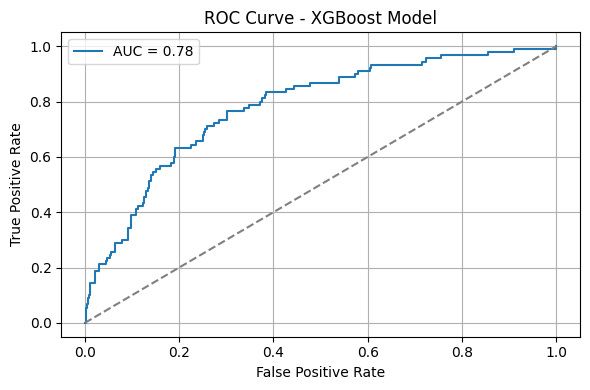


📊 Top 10 Important Features (XGBoost):
                    Feature  Importance
22          smokeStat_Never  213.595383
20        smokeStat_Current  180.201172
21         smokeStat_Former  128.241028
18       GeneralHealth_Fair   61.898003
15  GeneralHealth_Excellent   59.039055
17       GeneralHealth_Good   37.978798
16   GeneralHealth_VeryGood   29.403992
19       GeneralHealth_Poor   26.420540
9                       Age   18.359325
23          eCigUse_Current   10.659548


In [11]:
model_xgb, results_xgb = run_xgboost_booster_pipeline(
  X_train_res_scaled, y_train_res,
  X_val_scaled, y_val,
  X_test_scaled, y_test,
  features
)


**6. Transformer-TabPFN:**


✅ Best threshold (F1) for TabPFN: 0.11

🔎 Test Accuracy (TabPFN): 0.81
Classification Report (TabPFN):
              precision    recall  f1-score   support

     Class 0       0.96      0.82      0.89       883
     Class 1       0.28      0.68      0.40        90

    accuracy                           0.81       973
   macro avg       0.62      0.75      0.64       973
weighted avg       0.90      0.81      0.84       973

AUC-ROC (TabPFN): 0.81


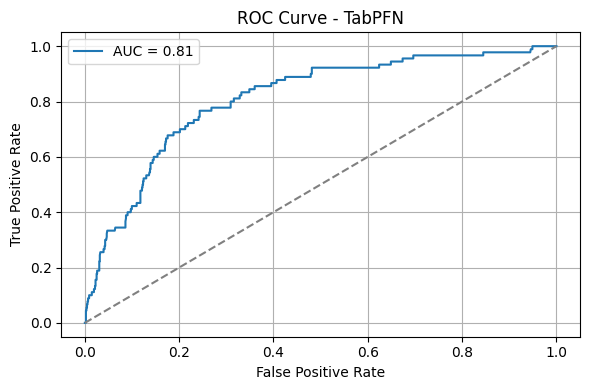

In [12]:
model_tabpfn, results_tabpfn = run_tabpfn_pipeline(
  X_train_res_scaled, y_train_res,
  X_val_scaled, y_val,
  X_test_scaled, y_test,
  features
)


**7. STACKING ENSEMBLE MODEL**


✅ Best threshold (F1) for ensemble: 0.13

🔎 Test Accuracy (Stacked): 0.83
Classification Report (Stacked):
              precision    recall  f1-score   support

     Class 0       0.95      0.86      0.90       883
     Class 1       0.29      0.58      0.39        90

    accuracy                           0.83       973
   macro avg       0.62      0.72      0.64       973
weighted avg       0.89      0.83      0.85       973

AUC-ROC (Stacked): 0.81


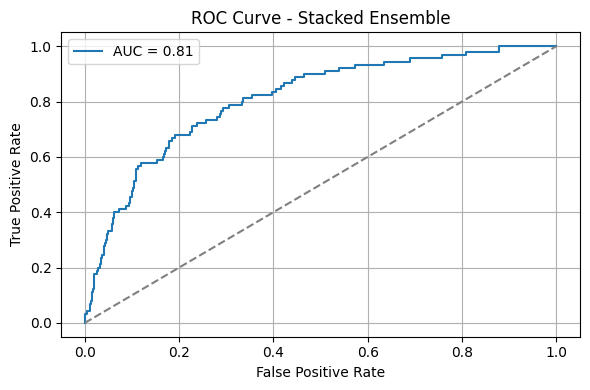


📊 Meta-model Feature Importance:
    Model  Importance
0  logreg        2.67
2  tabnet        1.09
4     xgb        1.02
5  tabpfn        0.78
3   saint        0.42
1      rf        0.10


In [13]:
base_val_probs = {
    "logreg": results_lr["val_probs"],
    "rf": results_rf["val_probs"],
    "tabnet": results_tabnet["val_probs"],
    "saint": results_saint["val_probs"],
    "xgb": results_xgb["val_probs"],
    "tabpfn": results_tabpfn["val_probs"]
}

base_test_probs = {
    "logreg": results_lr["test_probs"],
    "rf": results_rf["test_probs"],
    "tabnet": results_tabnet["test_probs"],
    "saint": results_saint["test_probs"],
    "xgb": results_xgb["test_probs"],
    "tabpfn": results_tabpfn["test_probs"]
}


meta_model_se, results_se = run_stacking_ensemble_pipeline(
    base_val_probs,
    base_test_probs,
    y_val, y_test,
    meta_model="logistic"  #"xgboost" or "logistic"
)


**SHAP PLOT**


🔍 Explaining model: Logistic Regression 



🔹 Feature Importance Table (mean SHAP and |SHAP|):
                             feature  mean_shap  mean_abs_shap
0           Very Good General Health  -0.049349       3.215280
1                Good General Health   0.033733       3.045427
2                       Never Smoker   0.534029       2.786655
3                      Former Smoker  -0.520108       2.006129
4           Excellent General Health   0.096145       1.607002
5                Fair General Health  -0.050528       1.298511
6                     Current Smoker   0.021645       1.131446
7            Never Used E-Cigarettes   0.248460       1.130573
8            Former E-Cigarette User  -0.241373       0.904281
9                          Age (Yrs)   0.004982       0.854475
10       Currently Uses E-Cigarettes  -0.016648       0.351157
11     Diagnosed High Blood Pressure  -0.010196       0.249381
12               Poor General Health  -0.008386       0.215745
13                    

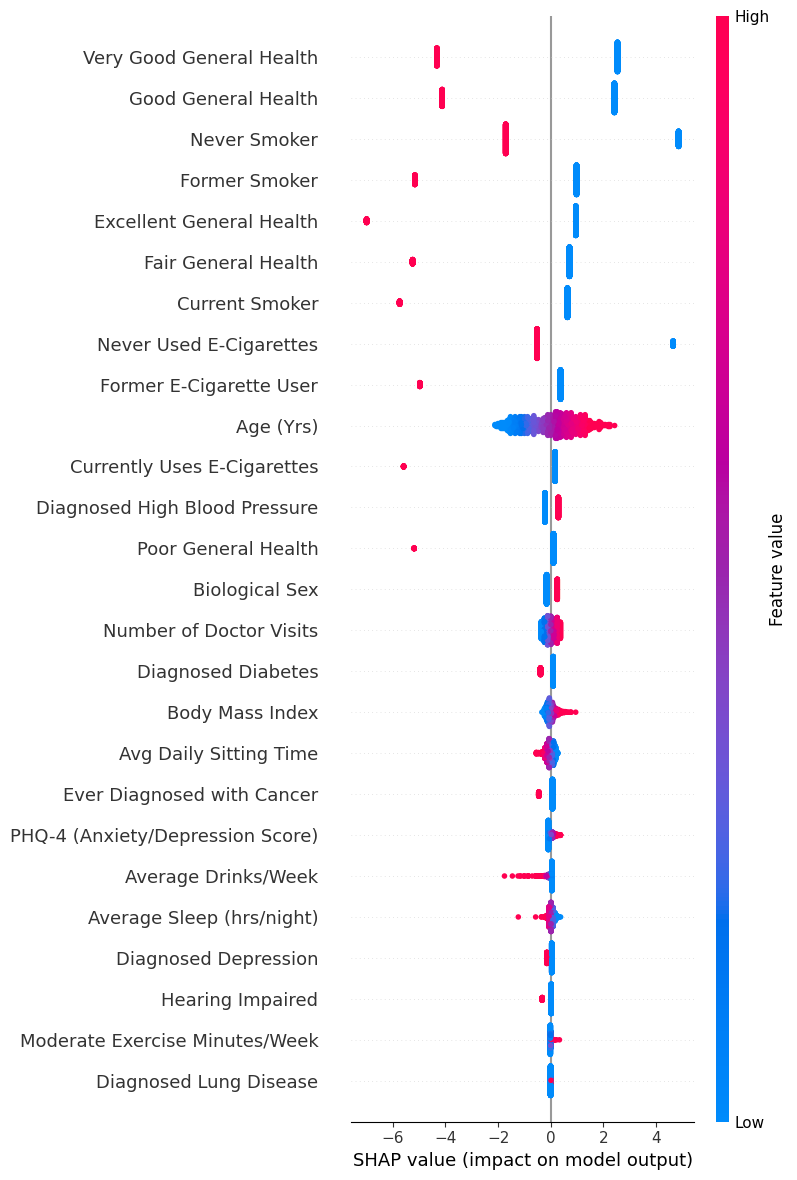


🔹 SHAP Feature Importance (Bar) Plot:


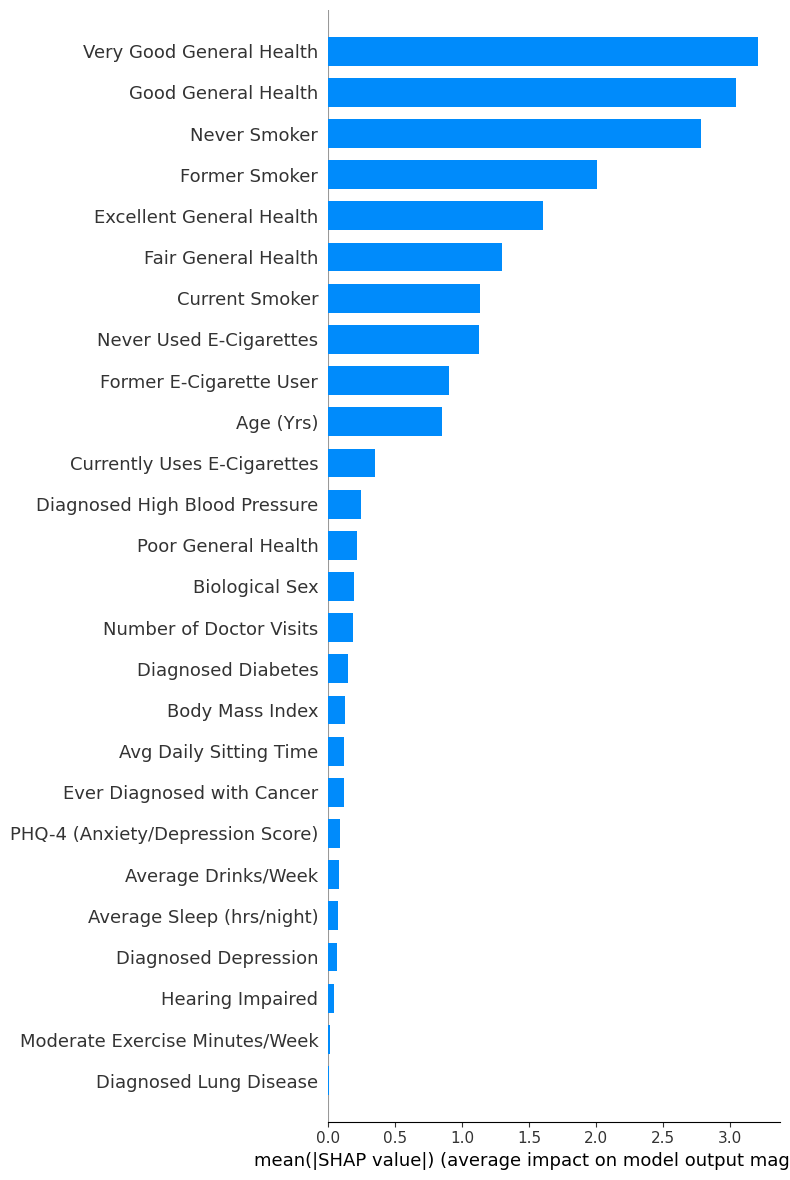


🔹 SHAP Waterfall Plot for First Instance:


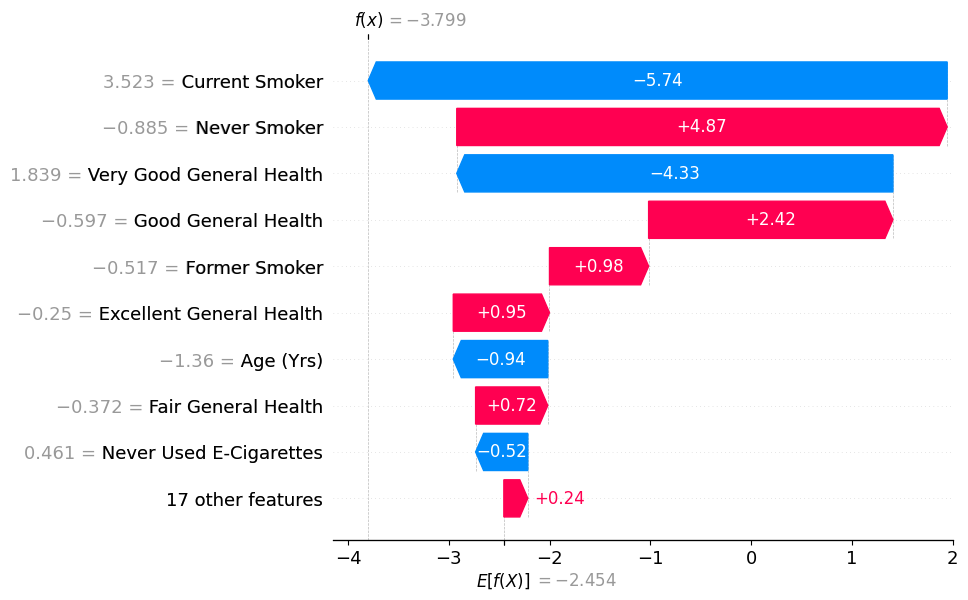


🔍 Explaining model: TabNet 




PermutationExplainer explainer: 974it [19:15,  1.19s/it]
<string>:101: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



🔹 Feature Importance Table (mean SHAP and |SHAP|):
                             feature  mean_shap  mean_abs_shap
0           Very Good General Health  -0.002169       0.207662
1                Good General Health   0.006619       0.195353
2                       Never Smoker   0.032053       0.157728
3                      Former Smoker  -0.018927       0.104420
4           Excellent General Health   0.004595       0.090818
5                Fair General Health  -0.006777       0.067404
6                     Current Smoker  -0.005204       0.048325
7            Former E-Cigarette User  -0.009710       0.028996
8            Never Used E-Cigarettes   0.005771       0.024842
9        Currently Uses E-Cigarettes  -0.000566       0.016679
10                         Age (Yrs)   0.000355       0.014392
11         Average Sleep (hrs/night)   0.002531       0.010191
12              Diagnosed Depression  -0.000322       0.009900
13                Diagnosed Diabetes  -0.001025       0.009872
14 

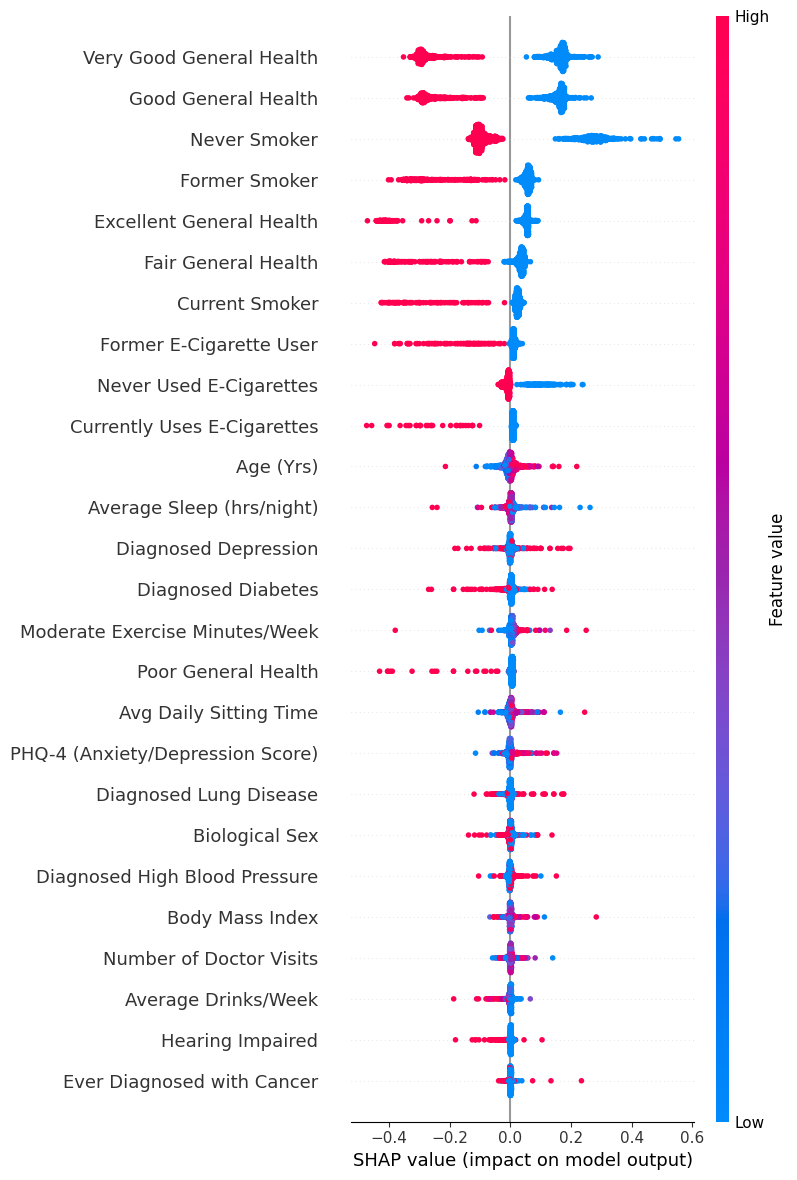


🔹 SHAP Feature Importance (Bar) Plot:


<string>:112: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.


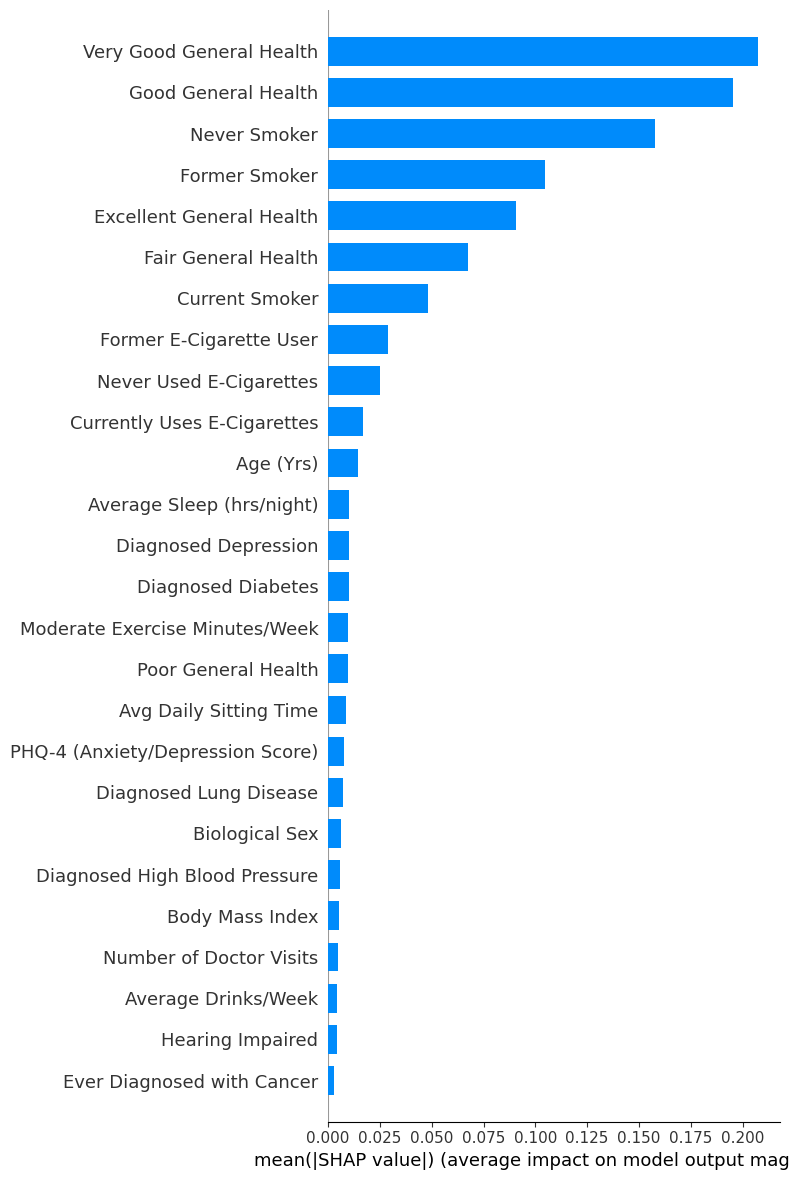

⚠️ Waterfall plot skipped: 'PermutationExplainer' object has no attribute 'expected_value'

🔍 Explaining model: XGBoost 



🔹 Feature Importance Table (mean SHAP and |SHAP|):
                             feature  mean_shap  mean_abs_shap
0                       Never Smoker  -0.805674       1.164264
1           Very Good General Health  -0.466721       0.783248
2                Good General Health  -0.212654       0.639183
3                          Age (Yrs)  -0.292127       0.607712
4                      Former Smoker  -0.056252       0.505732
5           Excellent General Health  -0.128019       0.340937
6                Fair General Health   0.071517       0.316367
7                     Current Smoker   0.023329       0.315986
8                    Body Mass Index  -0.034857       0.093242
9             Avg Daily Sitting Time  -0.025193       0.092323
10         Average Sleep (hrs/night)  -0.012824       0.089500
11           Number of Doctor Visits  -0.017986       0.087216
12    

<string>:101: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.


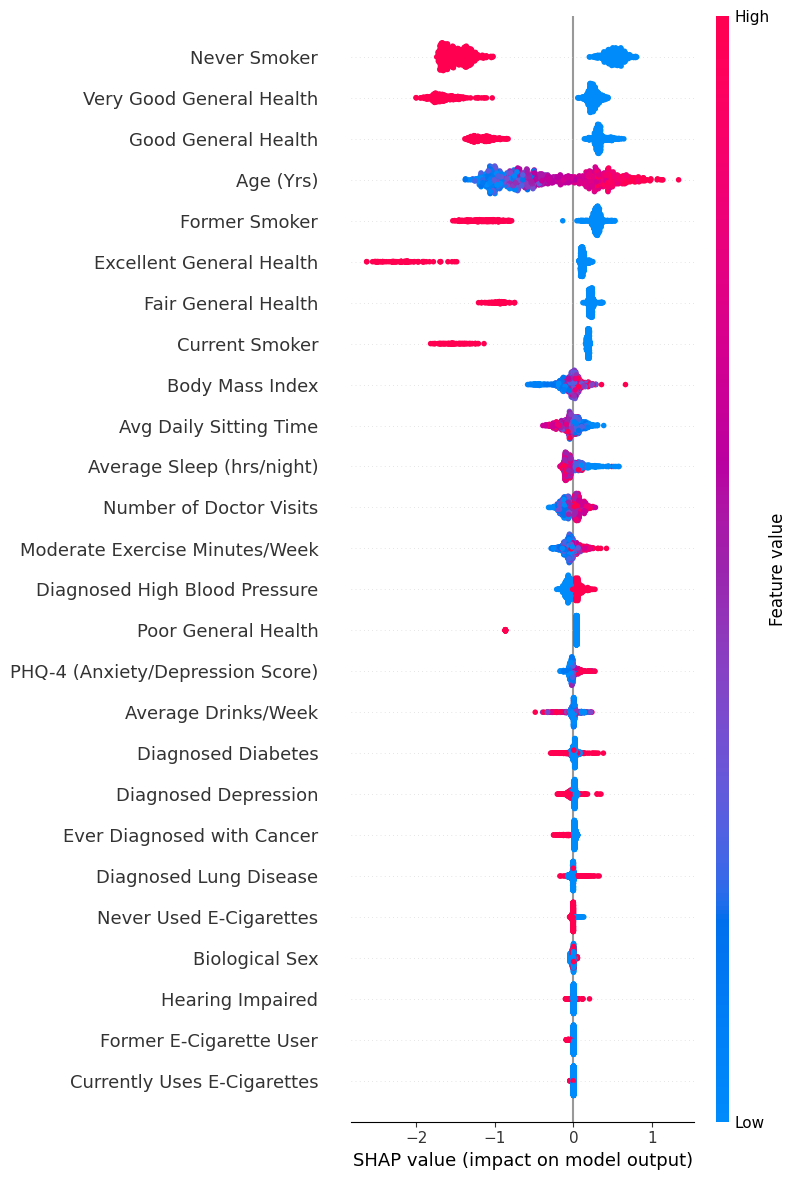


🔹 SHAP Feature Importance (Bar) Plot:


<string>:112: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.


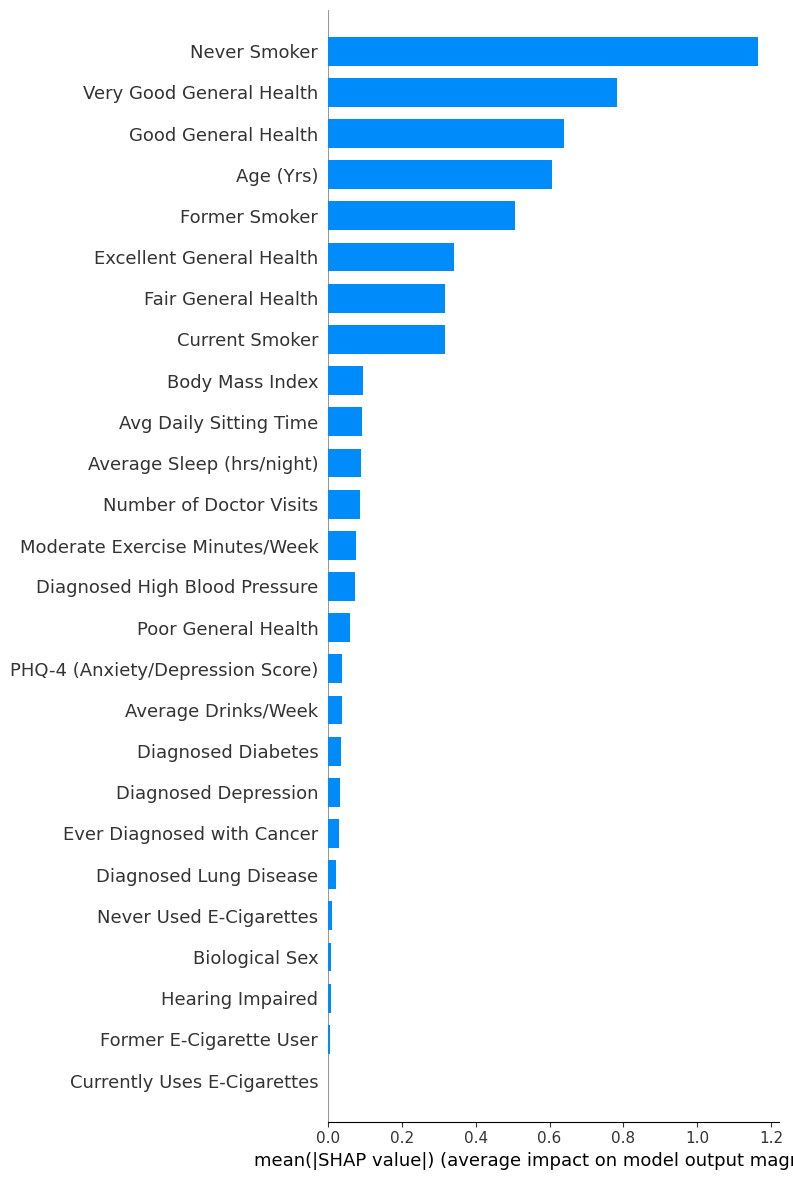


🔹 SHAP Waterfall Plot for First Instance:


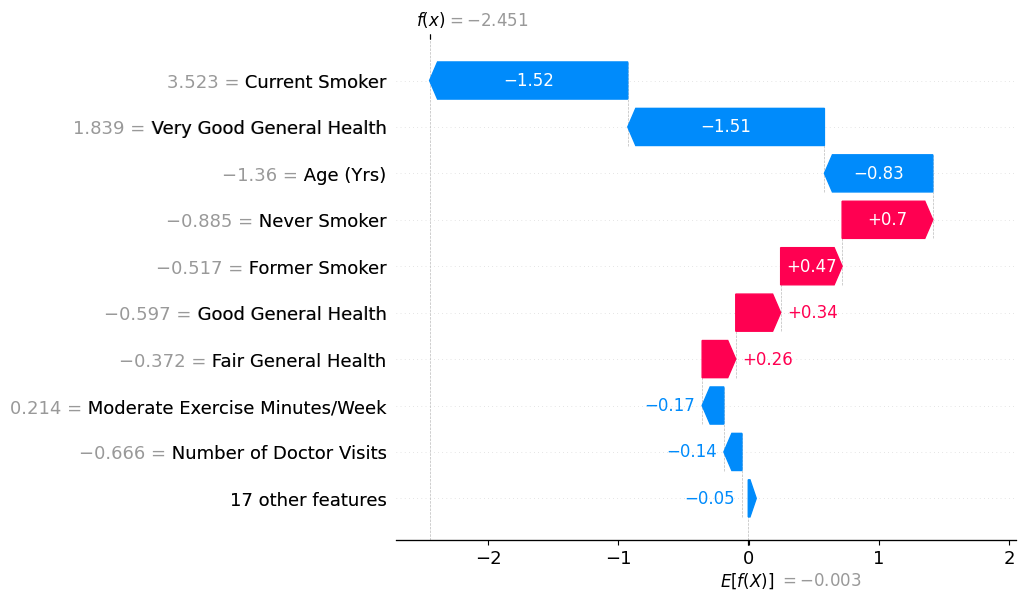

In [14]:
# models_list = [model_lr, model_rf, model_tabnet, model_saint, model_xgb, model_tabpfn]
models_list = [model_lr, model_tabnet, model_xgb]
model_names = ["Logistic Regression", "TabNet", "XGBoost"]
feature_names, feature_alias_map = getFeatureNamesAndAliasMap()

results = {}

for model, name in zip(models_list, model_names):
    print(f"\n🔍 Explaining model: {name} \n")
    print(f"==================================================\n")

    try:
        # Step 1: SHAP explanation
        shap_values, explainer, importance_df = explain_model_shap(
            model=model,
            X_test=X_test_scaled,
            return_importance=True,
            feature_alias_map=feature_alias_map, # Add this argument
            feature_names=feature_names, # Add this argument
        )

        # Step 2: SHAP plotting (customize flags as needed)
        plot_result = plot_shap(
            shap_values=shap_values,
            explainer=explainer,
            importance_df=importance_df,
            X_test=X_test_scaled,
            show_summary=True,
            show_bar=True,
            show_waterfall=True,  # May show only 1 row waterfall
            feature_alias_map=feature_alias_map, # Add this argument
            feature_names=feature_names, # Add this argument
        )

        # Store for later analysis
        results[name] = {
            "shap_values": shap_values,
            "explainer": explainer,
            "importance_df": importance_df,
            "plot_result": plot_result
        }


    except Exception as e:
        print(f"❌ Failed to explain {name}: {e}")

**EXPORT RESULTS**

In [ ]:
# export_result = export_merged_importance_matrics(importance_df_lr, importance_df_tabnet, importance_df_xgb)

importance_df_lr = results['Logistic Regression']['importance_df']
importance_df_tabnet = results['TabNet']['importance_df']
importance_df_xgb = results['XGBoost']['importance_df']

export_result = export_merged_importance_matrics(importance_df_lr, importance_df_tabnet, importance_df_xgb)


✅ Exported sheet 'importance_matrix_all' to: ../op_data/merged_importance_matrics.xlsx


**Export Complete Report to Excel Report**

In [ ]:
# Build and round summary
results_all = {
    "lr": results_lr,
    "rf": results_rf,
    "tabnet": results_tabnet,
    "saint": results_saint,
    "xgb": results_xgb,
    "tabpfn": results_tabpfn,
    "se": results_se
}

summary_df = build_model_metric_summary_df(results_all)
summary_df = summary_df.round(2)

# Show a sample
print(summary_df.sample(min(6, len(summary_df))))

# ✅ Export: overwrite file and replace the sheet
output_path = "../op_data/models_metric_summary.xlsx"
sheet_name = "models_metric_summary"

with pd.ExcelWriter(output_path, engine="openpyxl", mode="w") as writer:
    summary_df.to_excel(writer, index=False, sheet_name=sheet_name)

print(f"\n✅ Exported to '{output_path}' (sheet: '{sheet_name}') — existing file/sheet overwritten.")


  ModelName  Best_F1_Thres  Accuracy  AUC-ROC  Precision_Class0  \
0        lr           0.20      0.78     0.80              0.96   
4       xgb           0.29      0.83     0.78              0.94   
6        se           0.13      0.83     0.81              0.95   
2    tabnet           0.26      0.84     0.76              0.94   
5    tabpfn           0.11      0.81     0.81              0.96   
3     saint           0.12      0.73     0.79              0.96   

   Precision_Class1  Precision_MacroAvg  Precision_WeightedAvg  Recall_Class0  \
0              0.25                0.61                   0.90           0.79   
4              0.27                0.61                   0.88           0.87   
6              0.29                0.62                   0.89           0.86   
2              0.27                0.60                   0.88           0.88   
5              0.28                0.62                   0.90           0.82   
3              0.21                0.59     